In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
data=pd.read_csv("data.csv")

In [113]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [114]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [115]:
for col in data.columns:
    print(col,data[col].isnull().sum())

date 0
price 0
bedrooms 0
bathrooms 0
sqft_living 0
sqft_lot 0
floors 0
waterfront 0
view 0
condition 0
sqft_above 0
sqft_basement 0
yr_built 0
yr_renovated 0
street 0
city 0
statezip 0
country 0


In [116]:
data1=data.copy()

In [117]:
data1=data1.drop(['date','street','city','statezip','country'],axis=1)

In [118]:
data1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [119]:
data1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [120]:
data.shape

(4600, 18)

In [121]:
len(data['street'].unique())

4525

In [122]:
len(data['city'].unique())

44

In [123]:
count=0
for val in data['yr_renovated']:
    if val==0:
        count=count+1
print(count,len(data['yr_renovated']))

2735 4600


In [124]:
def getnull_count(colname):
    count=0
    for val in data[colname]:
        if val==0:
            count=count+1
    return count

In [125]:
def get_median_without_null(colname):
    not_null_yr_renovated = []
    for val in data[colname]:
        if val!=0:
            not_null_yr_renovated.append(val)
    fram = pd.DataFrame(not_null_yr_renovated, columns=['values'])
    med_yr = fram.median()
    return med_yr

In [126]:
data1['yr_renovated'] = data['yr_renovated']
data1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [127]:
temp = get_median_without_null('yr_renovated')
data1 = data1.replace({'yr_renovated':{0.0:float(temp)}})

In [128]:
data1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005.0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,2001.0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,2001.0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,2001.0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992.0


In [129]:
print(getnull_count('sqft_basement'), len(data1['sqft_basement']))

2745 4600


In [130]:
data1['sqft_basement'].median(),data1['sqft_basement'].mean() 

(0.0, 312.08152173913044)

In [131]:
data1=data1.replace({'sqft_basement':{0: data1['sqft_basement'].mean()}})

In [133]:
data1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,312.081522,1955,2005.0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280.000000,1921,2001.0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,312.081522,1966,2001.0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000.000000,1963,2001.0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800.000000,1976,1992.0


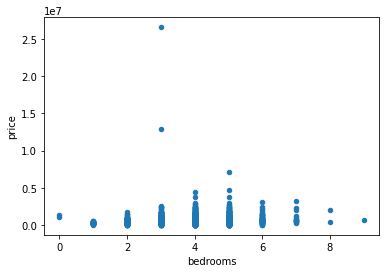

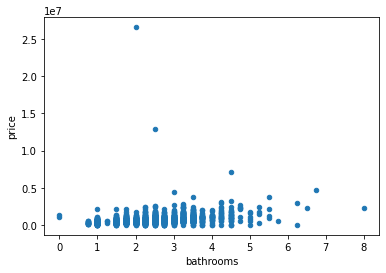

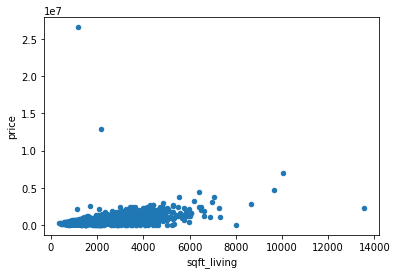

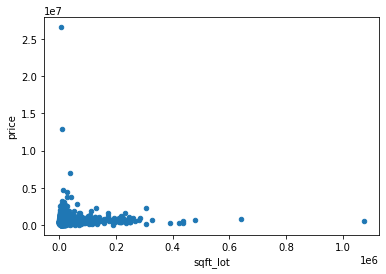

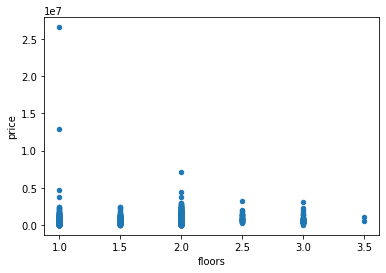

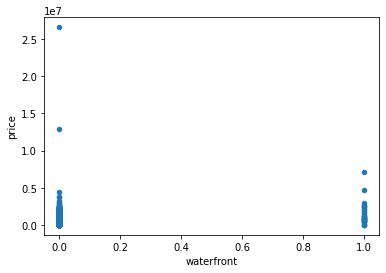

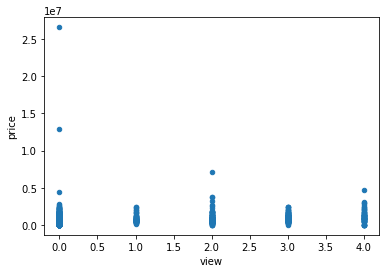

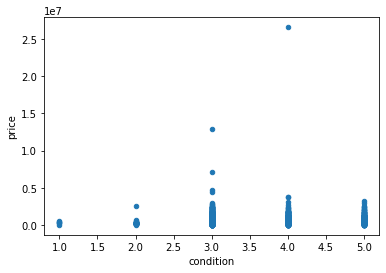

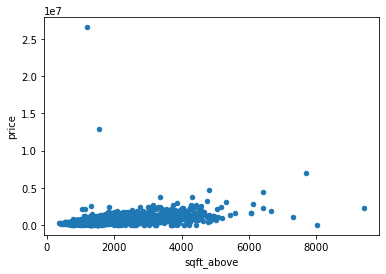

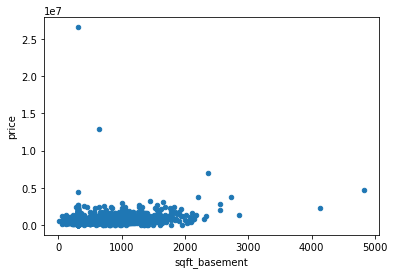

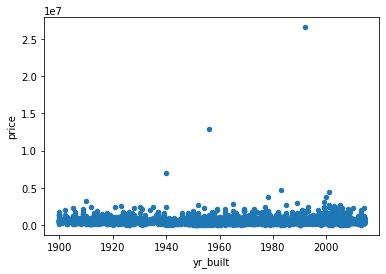

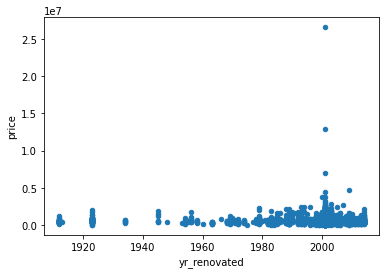

In [134]:

for col in data1.columns:
    if col!='price':
        data1.plot(kind='scatter',x=col, y='price')

['Shoreline' 'Seattle' 'Kent' 'Bellevue' 'Redmond' 'Maple Valley'
 'North Bend' 'Lake Forest Park' 'Sammamish' 'Auburn' 'Des Moines'
 'Bothell' 'Federal Way' 'Kirkland' 'Issaquah' 'Woodinville'
 'Normandy Park' 'Fall City' 'Renton' 'Carnation' 'Snoqualmie' 'Duvall'
 'Burien' 'Covington' 'Inglewood-Finn Hill' 'Kenmore' 'Newcastle'
 'Mercer Island' 'Black Diamond' 'Ravensdale' 'Clyde Hill' 'Algona'
 'Skykomish' 'Tukwila' 'Vashon' 'Yarrow Point' 'SeaTac' 'Medina'
 'Enumclaw' 'Snoqualmie Pass' 'Pacific' 'Beaux Arts Village' 'Preston'
 'Milton']


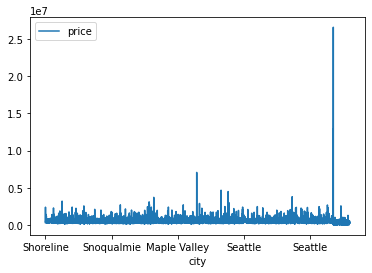

In [135]:
data.plot(x='city', y='price')
len(data['city'].unique())
print(data['city'].unique())

In [136]:
data1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [137]:
data1['city'] = data['city']

In [138]:
data1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city'],
      dtype='object')

In [139]:
data1 = pd.concat([data1,pd.get_dummies(data1['city'], prefix='city',dummy_na=True)], axis=1).drop(['city'],axis=1)
data1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,city_nan
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,1,0,0,0,0,0,0,0,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,1,0,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0


In [142]:
data1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city_Algona', 'city_Auburn',
       'city_Beaux Arts Village', 'city_Bellevue', 'city_Black Diamond',
       'city_Bothell', 'city_Burien', 'city_Carnation', 'city_Clyde Hill',
       'city_Covington', 'city_Des Moines', 'city_Duvall', 'city_Enumclaw',
       'city_Fall City', 'city_Federal Way', 'city_Inglewood-Finn Hill',
       'city_Issaquah', 'city_Kenmore', 'city_Kent', 'city_Kirkland',
       'city_Lake Forest Park', 'city_Maple Valley', 'city_Medina',
       'city_Mercer Island', 'city_Milton', 'city_Newcastle',
       'city_Normandy Park', 'city_North Bend', 'city_Pacific', 'city_Preston',
       'city_Ravensdale', 'city_Redmond', 'city_Renton', 'city_Sammamish',
       'city_SeaTac', 'city_Seattle', 'city_Shoreline', 'city_Skykomish',
       'city_Snoqualmie', 'city_Snoqualmie Pass', 'city_Tu

In [145]:
data['city'].unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [158]:
data1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,city_nan
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,1,0,0,0,0,0,0,0,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,1,0,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0


In [160]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [168]:
scalar.fit_transform(data1[['price']])

array([[-0.42386353],
       [ 3.2495981 ],
       [-0.37242442],
       ...,
       [-0.23956224],
       [-0.61826787],
       [-0.58775916]])

In [173]:
data1['price'] = scalar.fit_transform(data1[['price']])

In [174]:
data1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,city_nan
0,-0.423864,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,1,0,0,0,0,0,0,0,0
1,3.249598,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,1,0,0,0,0,0,0,0,0,0
2,-0.372424,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,-0.234071,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,-0.003482,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0


In [175]:
data1['bedrooms'] = scalar.fit_transform(data1[['bedrooms']])

In [176]:
data1['bathrooms'] = scalar.fit_transform(data1[['bathrooms']])

In [178]:
data1['sqft_living'] = scalar.fit_transform(data1[['sqft_living']])

In [179]:
data1['sqft_lot'] = scalar.fit_transform(data1[['sqft_lot']])

In [190]:
data1['floors'] = scalar.fit_transform(data1[['floors']])

In [181]:
data1['waterfront'].unique()

array([0, 1], dtype=int64)

In [183]:
data1['view'].unique()

array([0, 4, 1, 2, 3], dtype=int64)

In [184]:
data1['condition'].unique()

array([3, 5, 4, 2, 1], dtype=int64)

In [185]:
data1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,city_nan,fllors
0,-0.423864,-0.441122,-0.843204,-0.829971,-0.193434,1.5,0,0,3,1340,...,1,0,0,0,0,0,0,0,0,-0.022416
1,3.249598,1.759705,0.432802,1.568528,-0.161718,2.0,0,4,5,3370,...,0,0,0,0,0,0,0,0,0,0.906555
2,-0.372424,-0.441122,-0.205201,-0.217367,-0.080978,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,-0.951388
3,-0.234071,-0.441122,0.113800,-0.144686,-0.190145,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,-0.951388
4,-0.003482,0.659291,0.432802,-0.206984,-0.121306,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,-0.951388


In [188]:
data1 = data1.drop(['fllors'], axis=1)

In [191]:
data1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,city_nan
0,-0.423864,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,0,0,3,1340,...,0,1,0,0,0,0,0,0,0,0
1,3.249598,1.759705,0.432802,1.568528,-0.161718,0.906555,0,4,5,3370,...,1,0,0,0,0,0,0,0,0,0
2,-0.372424,-0.441122,-0.205201,-0.217367,-0.080978,-0.951388,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,-0.234071,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,-0.003482,0.659291,0.432802,-0.206984,-0.121306,-0.951388,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0


In [192]:
data1['sqft_above']=scalar.fit_transform(data1[['sqft_above']])

In [193]:
data1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,city_nan
0,-0.423864,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,0,0,3,-0.565224,...,0,1,0,0,0,0,0,0,0,0
1,3.249598,1.759705,0.432802,1.568528,-0.161718,0.906555,0,4,5,1.789559,...,1,0,0,0,0,0,0,0,0,0
2,-0.372424,-0.441122,-0.205201,-0.217367,-0.080978,-0.951388,0,0,4,0.119171,...,0,0,0,0,0,0,0,0,0,0
3,-0.234071,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,0,0,4,-0.959621,...,0,0,0,0,0,0,0,0,0,0
4,-0.003482,0.659291,0.432802,-0.206984,-0.121306,-0.951388,0,0,4,-0.797222,...,0,0,0,0,0,0,0,0,0,0


In [194]:
data1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city_Algona', 'city_Auburn',
       'city_Beaux Arts Village', 'city_Bellevue', 'city_Black Diamond',
       'city_Bothell', 'city_Burien', 'city_Carnation', 'city_Clyde Hill',
       'city_Covington', 'city_Des Moines', 'city_Duvall', 'city_Enumclaw',
       'city_Fall City', 'city_Federal Way', 'city_Inglewood-Finn Hill',
       'city_Issaquah', 'city_Kenmore', 'city_Kent', 'city_Kirkland',
       'city_Lake Forest Park', 'city_Maple Valley', 'city_Medina',
       'city_Mercer Island', 'city_Milton', 'city_Newcastle',
       'city_Normandy Park', 'city_North Bend', 'city_Pacific', 'city_Preston',
       'city_Ravensdale', 'city_Redmond', 'city_Renton', 'city_Sammamish',
       'city_SeaTac', 'city_Seattle', 'city_Shoreline', 'city_Skykomish',
       'city_Snoqualmie', 'city_Snoqualmie Pass', 'city_Tu

In [195]:
data1['sqft_basement']=scalar.fit_transform(data1[['sqft_basement']])
data1['yr_built']=scalar.fit_transform(data1[['yr_built']])
data1['yr_renovated']=scalar.fit_transform(data1[['yr_renovated']])

In [198]:
data1[['yr_built','yr_renovated', 'sqft_basement']].head()

,yr_built,yr_renovated,sqft_basement
0,-0.531014,0.476775,-0.531926
1,-1.674693,0.190713,-0.623560
2,-0.161000,0.190713,-0.531926
3,-0.261913,0.190713,1.432953
4,0.175376,-0.452926,0.861699


In [199]:
data1.shape

(4600, 58)

In [201]:
from sklearn.model_selection import train_test_split
y = data1['price']
x= data1.loc[:, data1.columns!='price']

In [203]:
y.head()

0   -0.423864
1    3.249598
2   -0.372424
3   -0.234071
4   -0.003482
Name: price, dtype: float64

In [204]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [208]:
X_train.shape

(3220, 57)

In [209]:
X_test.shape

(1380, 57)

In [211]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [212]:
model.fit(X_train, Y_train)

LinearRegression()

In [213]:
model.intercept_

-3983979509668.774

In [214]:
model.coef_

array([-5.73351690e-02,  4.75570417e-02,  2.65620000e-01, -7.08796433e-03,
       -2.83622085e-02,  1.14480651e+00,  7.70103596e-02,  5.60132757e-02,
        1.58736312e-01, -2.47434938e-03, -3.50034714e-02, -5.45506734e-03,
        3.98397951e+12,  3.98397951e+12,  3.98397951e+12,  3.98397951e+12,
        3.98397951e+12,  3.98397951e+12,  3.98397951e+12,  3.98397951e+12,
        3.98397951e+12,  3.98397951e+12,  3.98397951e+12,  3.98397951e+12,
        3.98397951e+12,  3.98397951e+12,  3.98397951e+12,  3.98397951e+12,
        3.98397951e+12,  3.98397951e+12,  3.98397951e+12,  3.98397951e+12,
        3.98397951e+12,  3.98397951e+12,  3.98397951e+12,  3.98397951e+12,
        3.98397951e+12,  3.98397951e+12,  3.98397951e+12,  3.98397951e+12,
        3.98397951e+12,  3.98397951e+12,  3.98397951e+12,  3.98397951e+12,
        3.98397951e+12,  3.98397951e+12,  3.98397951e+12,  3.98397951e+12,
        3.98397951e+12,  3.98397951e+12,  3.98397951e+12,  3.13826452e+05,
        3.98397951e+12,  

In [216]:
y_pred = model.predict(X_test)

In [217]:
y_pred

array([-0.39892578,  0.58935547, -0.33203125, ..., -0.13427734,
        0.9375    ,  0.31396484])

In [218]:
Y_test

1351   -0.289058
1687    0.794711
1297   -0.349366
2101   -0.287284
3920    0.289189
          ...   
3490   -0.198596
3584   -0.042505
855    -0.113455
309     1.739240
1929    0.179216
Name: price, Length: 1380, dtype: float64

In [241]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(Y_test,y_pred)

1.1501514661524102e+22

In [239]:
model.score(X_test, Y_test)

-2.7558516895636955e+22

In [225]:
data1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,city_nan
0,-0.423864,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,0,0,3,-0.565224,...,0,1,0,0,0,0,0,0,0,0
1,3.249598,1.759705,0.432802,1.568528,-0.161718,0.906555,0,4,5,1.789559,...,1,0,0,0,0,0,0,0,0,0
2,-0.372424,-0.441122,-0.205201,-0.217367,-0.080978,-0.951388,0,0,4,0.119171,...,0,0,0,0,0,0,0,0,0,0
3,-0.234071,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,0,0,4,-0.959621,...,0,0,0,0,0,0,0,0,0,0
4,-0.003482,0.659291,0.432802,-0.206984,-0.121306,-0.951388,0,0,4,-0.797222,...,0,0,0,0,0,0,0,0,0,0


In [226]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


F:\INeuron\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 57 is different from 13)

In [231]:
data1.shape

(4600, 58)